In [2]:
import pandas as pd

data = pd.read_csv('spam_ham_dataset.csv')
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
data.shape

(5171, 4)

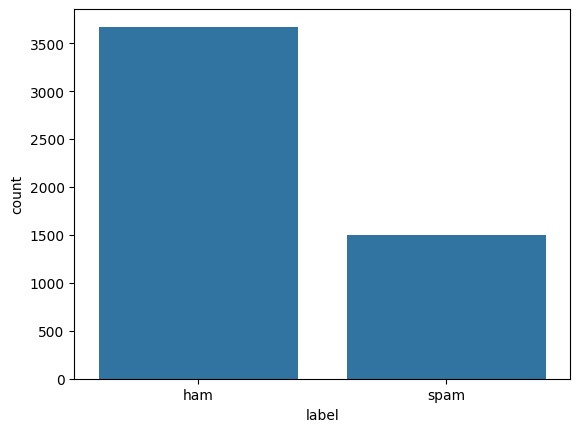

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='label')
plt.show()

In [5]:
ham_data = data[data['label']=='ham']
spam_data = data[data['label']=='spam']

print(f"spam size: {spam_data.head()} \n ham data head() \n {ham_data.head()}")

spam size:     Unnamed: 0 label                                               text  \
3         4685  spam  Subject: photoshop , windows , office . cheap ...   
7         4185  spam  Subject: looking for medication ? we ` re the ...   
10        4922  spam  Subject: vocable % rnd - word asceticism\r\nvc...   
11        3799  spam  Subject: report 01405 !\r\nwffur attion brom e...   
13        3948  spam  Subject: vic . odin n ^ ow\r\nberne hotbox car...   

    label_num  
3           1  
7           1  
10          1  
11          1  
13          1   
 ham data head() 
    Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   
5        2949   ham  Subject: ehronline web address 

In [6]:
spam_count = spam_data.shape[0]
ham_count = ham_data.shape[0]

count = min(spam_count, ham_count)

# dataset balance randomly
ham_data = ham_data.sample(n=count, random_state=42)

#print(ham_data.head())

# full dataset balanced
dataset = pd.concat([ham_data, spam_data], axis=0)

# shuffle dataset
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Dataset balanced at {count}")
print(f"Ham shape: {ham_data.shape}")
print(f"Spam shape: {spam_data.shape}")
print(f"Final dataset shape: {dataset.shape}")
print(dataset.head())

Dataset balanced at 1499
Ham shape: (1499, 4)
Spam shape: (1499, 4)
Final dataset shape: (2998, 4)
   Unnamed: 0 label                                               text  \
0        1940   ham  Subject: october flow at meter 982694 zavisch ...   
1         425   ham  Subject: fw : midcon 9401 ( permanent march fi...   
2        1662   ham  Subject: eastrans nomination change effective ...   
3        4284  spam   Subject: complimentary to you - ibm laptop !\r\n   
4        2804   ham  Subject: re : fw : first delivery - rodessa op...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  


In [7]:
X = dataset["text"]
y = dataset["label"]


In [8]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)
print(f"Train X shape: {train_x.shape}")
print(f"Train y shape: {train_y.shape}")
print(f"Test X shape: {test_x.shape}")
print(f"Test y shape: {test_y.shape}")


Train X shape: (2398,)
Train y shape: (2398,)
Test X shape: (600,)
Test y shape: (600,)


In [9]:
from sklearn.svm import LinearSVC

# vectorize
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words="english",
    max_features=10000
)

X_train_vec = vectorizer.fit_transform(train_x)
X_test_vec = vectorizer.transform(test_x)


model = LinearSVC()
model.fit(X_train_vec, train_y)


LinearSVC()

In [10]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(test_y, y_pred))
print(classification_report(test_y, y_pred))


Accuracy: 0.9816666666666667
              precision    recall  f1-score   support

         ham       1.00      0.97      0.98       317
        spam       0.96      1.00      0.98       283

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600

